# 고객 취향 분석

고민사항 1. 결측치를 어떻게 처리할까? 채울 수 있는 방법이 있지 않을까?

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('2019-Oct_purchase.csv')
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
3,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
4,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


# 데이터 EDA

In [3]:
# 변수 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742849 entries, 0 to 742848
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     742849 non-null  object 
 1   event_type     742849 non-null  object 
 2   product_id     742849 non-null  int64  
 3   category_id    742849 non-null  int64  
 4   category_code  569424 non-null  object 
 5   brand          684544 non-null  object 
 6   price          742849 non-null  float64
 7   user_id        742849 non-null  int64  
 8   user_session   742849 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 51.0+ MB


In [4]:
# 범주형 데이터 값 확인
display(data.event_type.unique())
display(data.category_code.unique()[:5])
display(data.brand.unique())

array(['purchase'], dtype=object)

array(['electronics.smartphone', nan, 'furniture.bathroom.toilet',
       'electronics.audio.headphone', 'appliances.environment.air_heater'],
      dtype=object)

array(['samsung', 'apple', 'xiaomi', ..., 'esthetichouse', 'bsa-wheels',
       'trendbeauty'], dtype=object)

In [5]:
# 결측치 비율 확인
data.isnull().sum() / len(data) * 100

event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
category_code    23.345929
brand             7.848836
price             0.000000
user_id           0.000000
user_session      0.000000
dtype: float64

In [6]:
# category_code null 값인 행만
data[data.category_code.isnull()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
11,2019-10-01 02:19:12 UTC,purchase,13103842,2053013553526341921,NaN,pdw,391.26,516178643,4d74b49e-3838-43cc-ac2e-a0490942b464
13,2019-10-01 02:19:59 UTC,purchase,28100119,2053013564918072245,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
17,2019-10-01 02:20:28 UTC,purchase,26601440,2053013563517174627,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
20,2019-10-01 02:21:07 UTC,purchase,16500007,2053013556462354899,NaN,omron,62.52,516815266,918c33db-9bb0-41b9-a148-47523330eddd
...,...,...,...,...,...,...,...,...,...
742836,2019-10-31 23:49:26 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.58,514905226,6f25d2de-bb1c-4e68-b848-f03372fb6e7d
742840,2019-10-31 23:51:02 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
742841,2019-10-31 23:53:18 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
742843,2019-10-31 23:54:33 UTC,purchase,26205284,2053013563693335403,NaN,NaN,143.89,513040838,639dc99e-72cd-433d-ad90-24c78d71418f


In [7]:
# 결측치 제거
data = data.dropna()

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
# 연속형 변수 분포 확인
data.describe()['price'] # price 이외의 변수는 의미 없음

count    549507.000000
mean        371.001168
std         370.971646
min           0.880000
25%         131.530000
50%         230.880000
75%         462.440000
max        2574.040000
Name: price, dtype: float64

/var/folders/s3/qf7_0f3s7137frvkybd7gfqh0000gn/T/ipykernel_4863/1954208680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


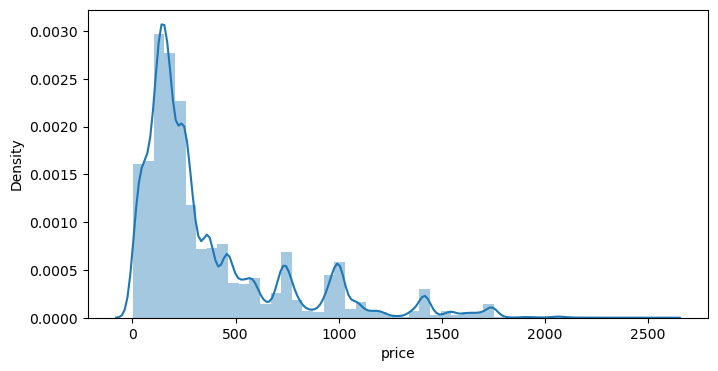

In [10]:
# price 분포 시각화
plt.figure(figsize=(8, 4))
sns.distplot(data.price)
plt.show()


In [11]:
# 카테고리 분포 확인
data.category_code.value_counts(normalize=True)*100


category_code
electronics.smartphone         61.432338
electronics.audio.headphone     5.539329
electronics.video.tv            3.921333
electronics.clocks              3.029443
appliances.kitchen.washer       2.922438
                                 ...    
apparel.skirt                   0.000546
apparel.jeans                   0.000546
apparel.shorts                  0.000364
apparel.jumper                  0.000364
apparel.jacket                  0.000182
Name: proportion, Length: 120, dtype: float64

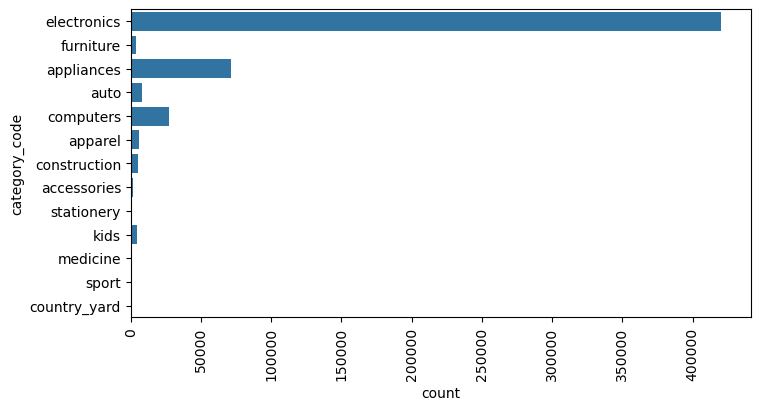

In [13]:


category_temp = data.category_code.apply(lambda x: x.split('.')[0])
plt.figure(figsize=(8,4))
sns.countplot(category_temp)
plt.xticks(rotation=90)
plt.show()


In [14]:
# 카테고리 파싱
data[['ctg_1', 'ctg_2', 'ctg_3', 'ctg_4']] = data['category_code'].str.split('.', expand=True)


In [15]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,ctg_1,ctg_2,ctg_3,ctg_4
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone,None,None
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone,None,None
2,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,bathroom,toilet,None
3,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,audio,headphone,None
4,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,audio,headphone,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549502,2019-10-31 23:53:53 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,electronics,smartphone,None,None
549503,2019-10-31 23:55:21 UTC,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,construction,tools,light,None
549504,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,electronics,smartphone,None,None
549505,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,electronics,smartphone,None,None


In [20]:
# 카테고리 대분류 값과 비율 확인
pd.concat([data['ctg_1'].value_counts(), data['ctg_1'].value_counts(normalize=True)], axis=1)

,count,proportion
ctg_1,,
electronics,420361,0.764978
appliances,71231,0.129627
computers,27151,0.049410
auto,7869,0.014320
apparel,6152,0.011195
construction,5439,0.009898
kids,4529,0.008242
furniture,3828,0.006966
accessories,1432,0.002606


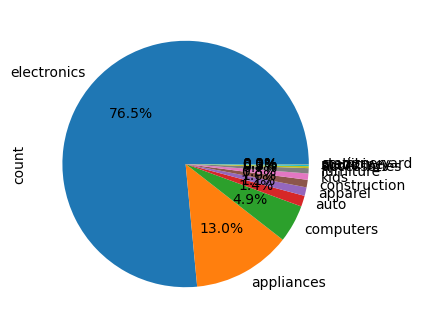

In [25]:
# 카테고리 분포 시각화, 원차트 (대분류 기준)
plt.figure(figsize=(4, 4))
data['ctg_1'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

- 카테고리 분포   
   
    전자제품이 76.5%   
    생활가전이 13.0%   
       
    90%가 전자제품or생활가전

In [33]:
# 전자제품 카테고리 세부 분포 확인
pd.concat([data.loc[data.ctg_1=='electronics', ['ctg_2']].value_counts(), # 전자제품 카테고리별 개수
        data.loc[data.ctg_1=='electronics', ['ctg_2']].value_counts(normalize=True)], axis=1) # 전자제품 카테고리별 비율

,count,proportion
ctg_2,,
smartphone,337575,0.803060
audio,34653,0.082436
video,21630,0.051456
clocks,16647,0.039602
tablet,5599,0.013320
telephone,3733,0.008880
camera,524,0.001247


In [36]:
# 전자제품 - 스마트폰 카테고리 세부 분포 확인
pd.concat([data.loc[(data.ctg_1=='electronics')&(data.ctg_2 == 'smartphone'), ['brand']].value_counts(), # 전자제품 카테고리별 개수
        data.loc[(data.ctg_1=='electronics')&(data.ctg_2 == 'smartphone'), ['brand']].value_counts(normalize=True)], axis=1)[:10] # 전자제품 카테고리별 비율

,count,proportion
brand,,
samsung,143123,0.423974
apple,115345,0.341687
xiaomi,38776,0.114866
huawei,21882,0.064821
oppo,10891,0.032262
vivo,2025,0.005999
meizu,1686,0.004994
honor,555,0.001644
nokia,512,0.001517


- 스마트폰 카테고리 점유율   
   
    삼성 - 42%   
    애플 - 34%   
    샤오미 - 11%   
    화웨이 - 6%   
    오포 - 3%   

In [38]:
# 생활가전 카테고리 세부 분포 확인
pd.concat([data.loc[data.ctg_1=='appliances', ['ctg_2']].value_counts(), # 전자제품 카테고리별 개수
        data.loc[data.ctg_1=='appliances', ['ctg_2']].value_counts(normalize=True)], axis=1) # 전자제품 카테고리별 비율

,count,proportion
ctg_2,,
kitchen,45057,0.632548
environment,17437,0.244795
iron,3647,0.051200
personal,2493,0.034999
sewing_machine,1939,0.027221
ironing_board,658,0.009238


#### 카테고리 분포 및 점유율
- 카테고리
    - 전자제품(76.5%)
        - 스마트폰(80%)
            - 삼성(42%)
            - 애플(34%)
            - 샤오미(11%)
            - 화웨이(6%)
            - 오포(3%)   
            ... 
        - 오디오(8%)
        - 비디오(5%)   
        ... 
    - 생활가전(13%)
        - 주방가전(63%)
        - 환경가전(24%)   
        ...



## 트랜잭션 단위 데이터를 유저 단위 데이터로 변경

In [53]:
#agg는 집계함수 그룹핑한 것에 대해 집계할 때 사용

# eventtime을 datetime으로 변환
data['event_time'] = pd.to_datetime(data['event_time'])

user_data = data.groupby('user_id').agg(purchase_count=('event_time', 'count'), # 구매 횟수
                                    total_spent=('price', 'sum'), # 총 구매액
                                    avg_spent=('price', 'mean'), # 평균 구매액
                                    max_spent=('price', 'max'), # 최대 구매액
                                    min_spent=('price', 'min'), # 최소 구매액
                                    first_purchase=('event_time', 'min'), # 첫 구매일
                                    last_purchase=('event_time', 'max'), # 마지막 구매일
                                    duration=('event_time', lambda x: x.max() - x.min()), # 구매 기간
                                    category_count=('category_code', 'nunique'), # 구매한 카테고리 수
                                    )

In [57]:
# 구매 횟수에 따른 고객 분류
user_data['category_count'].value_counts()

category_count
1     232190
2      25004
3       4497
4       1144
5        378
6        133
7         68
8         20
9          7
10         1
11         1
12         1
19         1
Name: count, dtype: int64